In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("Lung_Hsapiens_GSE81089.csv")

### Transformar classes em 0 e 1

In [11]:
X = data.drop(columns=['Sample', 'Condition'])
y = data['Condition'].map({'Tumor': 1, 'Normal': 0})

### Estatísticas sem normalização

In [21]:
data.describe()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288714,ENSG00000288717,ENSG00000288718,ENSG00000288719,ENSG00000288720,ENSG00000288721,ENSG00000288722,ENSG00000288723,ENSG00000288724,ENSG00000288725
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,10.592370,4.682570,10.320724,9.632958,8.946446,9.407107,12.309610,11.163916,11.261785,10.803355,...,4.500701,4.453257,4.650719,4.530402,5.847597,5.781465,9.300326,4.651600,4.453491,4.623048
std,0.751414,0.730655,0.430486,0.435481,0.636846,0.896627,0.883022,0.552389,1.521847,0.448274,...,0.172388,0.118361,0.237696,0.183178,0.398504,0.418524,0.698487,0.302111,0.114502,0.452858
min,8.952521,4.412213,9.391894,8.573434,7.449853,6.874128,8.796813,8.184018,8.484245,9.809059,...,4.412213,4.412213,4.412213,4.412213,4.748301,4.889117,7.430932,4.412213,4.412213,4.412213
25%,10.088247,4.412213,10.033947,9.342409,8.541723,8.795742,11.848039,10.860458,9.999476,10.464013,...,4.412213,4.412213,4.412213,4.412213,5.590668,5.475257,8.811624,4.412213,4.412213,4.412213
50%,10.652930,4.412213,10.246332,9.626421,8.973148,9.379883,12.319451,11.177582,10.978091,10.797111,...,4.412213,4.412213,4.703371,4.412213,5.824834,5.763056,9.375035,4.412213,4.412213,4.412213
75%,11.051862,4.726794,10.513999,9.899066,9.349417,9.891574,12.946980,11.484797,12.184846,11.056514,...,4.412213,4.412213,4.857524,4.700760,6.104199,6.039761,9.737670,4.789919,4.412213,4.412213
max,12.881711,11.410328,12.031514,11.342650,10.708087,12.007233,14.557834,12.953745,15.082469,12.060586,...,5.151938,4.986675,5.305489,5.232890,7.085804,7.093357,11.034090,5.692199,4.883931,6.299483


### PCA

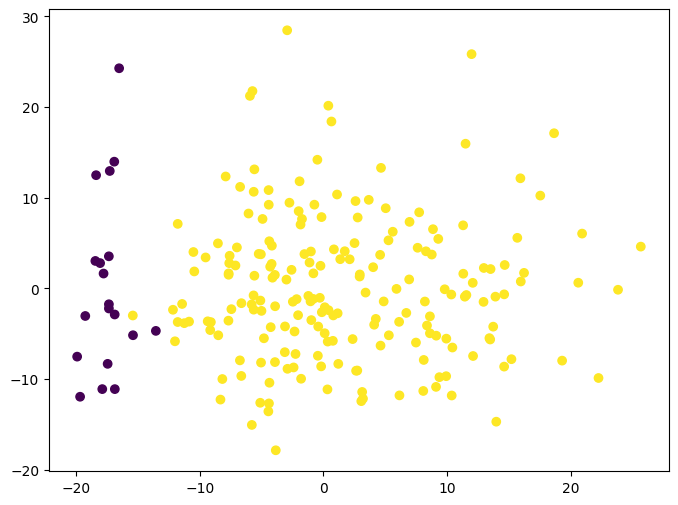

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')

plt.show()

### Normalização

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.tail()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288714,ENSG00000288717,ENSG00000288718,ENSG00000288719,ENSG00000288720,ENSG00000288721,ENSG00000288722,ENSG00000288723,ENSG00000288724,ENSG00000288725
213,0.209978,0.109338,0.301658,0.513064,0.393476,0.664363,0.642408,0.695571,0.283081,0.227669,...,0.744648,0.0,0.000000,0.000000,0.522953,0.339044,0.586610,0.0,0.0,0.718165
214,0.099845,0.063664,0.244592,0.400671,0.210628,0.891414,0.619146,0.636366,0.216217,0.251354,...,0.392067,0.0,0.341397,0.000000,0.354353,0.242709,0.452071,0.0,0.0,0.000000
215,0.362193,0.070426,0.204262,0.294049,0.121972,0.806701,0.549135,0.611746,0.234403,0.144090,...,0.000000,0.0,0.496636,0.000000,0.117446,0.243425,0.616818,0.0,0.0,0.000000
216,0.047307,0.000000,0.252190,0.272637,0.263730,0.925371,0.547631,0.636443,0.259751,0.294240,...,0.000000,0.0,0.347054,0.000000,0.470700,0.098023,0.243106,0.0,0.0,0.711146
217,0.012875,0.090704,0.181179,0.159097,0.108306,0.767388,0.747419,0.570813,0.208312,0.399632,...,0.622438,0.0,0.542620,0.480375,0.346833,0.354975,0.052664,0.0,0.0,0.438337


### Estatisticas com dados normalizados

In [32]:
X.describe(include='all')

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288714,ENSG00000288717,ENSG00000288718,ENSG00000288719,ENSG00000288720,ENSG00000288721,ENSG00000288722,ENSG00000288723,ENSG00000288724,ENSG00000288725
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.417350,0.038633,0.351880,0.382608,0.459326,0.493459,0.609753,0.624752,0.420953,0.441610,...,0.119623,0.071448,0.267001,0.144015,0.470286,0.404832,0.518821,0.187023,0.087506,0.111714
std,0.191239,0.104407,0.163087,0.157258,0.195457,0.174675,0.153275,0.115811,0.230645,0.199098,...,0.233044,0.206038,0.266094,0.223204,0.170483,0.189872,0.193854,0.236027,0.242733,0.239954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.289048,0.000000,0.243237,0.277687,0.335111,0.374357,0.529633,0.561131,0.229642,0.290893,...,0.000000,0.000000,0.000000,0.000000,0.360370,0.265915,0.383189,0.000000,0.000000,0.000000
50%,0.432763,0.000000,0.323697,0.380247,0.467522,0.488156,0.611461,0.627617,0.377957,0.438837,...,0.000000,0.000000,0.325944,0.000000,0.460548,0.396481,0.539555,0.000000,0.000000,0.000000
75%,0.534294,0.044952,0.425101,0.478703,0.583004,0.587840,0.720387,0.692027,0.560848,0.554048,...,0.000000,0.000000,0.498514,0.351597,0.580063,0.522014,0.640199,0.295086,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Estatistica Descritiva e Visualização da distribuição dos dados selecionados

- Como os dados possuem muitas features (quase 40k), selecionei 20 features aleatórias

In [15]:
import random

random.seed(42) 
tumor_indices = data[data['Condition'] == 'Tumor'].index
normal_indices = data[data['Condition'] == 'Normal'].index

tumor_features = random.sample(list(X.columns), 10)
normal_features = random.sample(list(X.columns), 10)

selected_features = tumor_features + normal_features
X_selected = X[selected_features]

### Estatisticas das features selecionadas

In [16]:
X_selected.describe()

,ENSG00000136895,ENSG00000084774,ENSG00000205838,ENSG00000187812,ENSG00000180974,ENSG00000149596,ENSG00000133706,ENSG00000277135,ENSG00000125864,ENSG00000286611,ENSG00000250626,ENSG00000099308,ENSG00000092094,ENSG00000130005,ENSG00000179141,ENSG00000184115,ENSG00000268182,ENSG00000287620,ENSG00000087338,ENSG00000279923
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.504258,0.557413,0.290445,0.030647,0.047703,0.432198,0.406226,0.257187,0.361438,0.035842,0.031833,0.448135,0.533514,0.414612,0.117341,0.196202,0.268200,0.424312,0.423404,0.518505
std,0.146366,0.176540,0.147998,0.131890,0.169804,0.188486,0.180556,0.211255,0.161356,0.166363,0.117659,0.162201,0.160365,0.185171,0.184749,0.197003,0.130199,0.172453,0.146848,0.194537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.411707,0.461695,0.186907,0.000000,0.000000,0.289554,0.283513,0.000000,0.247963,0.000000,0.000000,0.345765,0.437105,0.281062,0.000000,0.000000,0.183422,0.323101,0.323988,0.410745
50%,0.496521,0.564196,0.264638,0.000000,0.000000,0.429086,0.384697,0.266949,0.363931,0.000000,0.000000,0.451432,0.527879,0.388105,0.000000,0.171336,0.266977,0.417522,0.427163,0.527636
75%,0.592361,0.660980,0.358072,0.000000,0.000000,0.558965,0.504026,0.383561,0.453574,0.000000,0.000000,0.547483,0.625984,0.548818,0.213684,0.314315,0.347656,0.535221,0.494247,0.653218
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Estatistica Descritiva da classe tumor (features selecionadas)

In [43]:
estatistica_tumor = X_selected.loc[tumor_indices].describe()
estatistica_tumor

,ENSG00000136895,ENSG00000084774,ENSG00000205838,ENSG00000187812,ENSG00000180974,ENSG00000149596,ENSG00000133706,ENSG00000277135,ENSG00000125864,ENSG00000286611,ENSG00000250626,ENSG00000099308,ENSG00000092094,ENSG00000130005,ENSG00000179141,ENSG00000184115,ENSG00000268182,ENSG00000287620,ENSG00000087338,ENSG00000279923
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.495840,0.580851,0.286509,0.033573,0.052258,0.408068,0.413997,0.231701,0.357744,0.039264,0.025159,0.431195,0.535708,0.428796,0.119807,0.199412,0.267294,0.408092,0.436508,0.510518
std,0.145463,0.159929,0.145670,0.137715,0.177090,0.174231,0.184594,0.189532,0.166209,0.173774,0.113501,0.151082,0.164922,0.186206,0.186628,0.201762,0.133288,0.167611,0.144563,0.194256
min,0.000000,0.178076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.401081,0.486582,0.186407,0.000000,0.000000,0.276472,0.284795,0.000000,0.241309,0.000000,0.000000,0.338518,0.435854,0.292139,0.000000,0.000000,0.183802,0.308975,0.334944,0.410009
50%,0.492127,0.572711,0.262472,0.000000,0.000000,0.407292,0.387599,0.245160,0.356216,0.000000,0.000000,0.435944,0.527756,0.416202,0.000000,0.174899,0.264031,0.404798,0.435817,0.515314
75%,0.586195,0.672927,0.357571,0.000000,0.000000,0.528288,0.517786,0.363961,0.450030,0.000000,0.000000,0.533150,0.637934,0.574864,0.217501,0.319383,0.347630,0.517942,0.507350,0.636453
max,0.916838,1.000000,1.000000,1.000000,1.000000,0.908947,1.000000,0.714865,1.000000,1.000000,1.000000,0.933861,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Estatistica Descritiva da classe normal (features selecionadas)

In [44]:
estatistica_normal = X_selected.loc[normal_indices].describe()
estatistica_normal

,ENSG00000136895,ENSG00000084774,ENSG00000205838,ENSG00000187812,ENSG00000180974,ENSG00000149596,ENSG00000133706,ENSG00000277135,ENSG00000125864,ENSG00000286611,ENSG00000250626,ENSG00000099308,ENSG00000092094,ENSG00000130005,ENSG00000179141,ENSG00000184115,ENSG00000268182,ENSG00000287620,ENSG00000087338,ENSG00000279923
count,19.000000,19.000000,19.000000,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.592428,0.311936,0.331671,0.0,0.0,0.684920,0.324835,0.524117,0.400127,0.0,0.101732,0.625552,0.510529,0.266058,0.091519,0.162577,0.277687,0.594193,0.286162,0.602158
std,0.128538,0.157157,0.169341,0.0,0.0,0.143268,0.102636,0.245940,0.090922,0.0,0.139769,0.172303,0.101130,0.080290,0.166077,0.137056,0.093993,0.127025,0.091153,0.181817
min,0.449952,0.000000,0.156137,0.0,0.0,0.478943,0.132307,0.000000,0.143912,0.0,0.000000,0.290340,0.322511,0.050387,0.000000,0.000000,0.101393,0.325043,0.109530,0.275392
25%,0.513382,0.219136,0.210617,0.0,0.0,0.547232,0.246691,0.365434,0.351259,0.0,0.000000,0.536823,0.456178,0.234221,0.000000,0.042875,0.204736,0.491090,0.223224,0.458736
50%,0.573704,0.353189,0.309407,0.0,0.0,0.706471,0.334911,0.531180,0.435307,0.0,0.000000,0.677088,0.535839,0.294626,0.000000,0.159105,0.301797,0.598528,0.285065,0.640090
75%,0.639445,0.412150,0.364130,0.0,0.0,0.795526,0.407640,0.653985,0.463698,0.0,0.243161,0.718969,0.581812,0.322759,0.199553,0.218722,0.348544,0.724598,0.335769,0.747438
max,1.000000,0.597624,0.887151,0.0,0.0,1.000000,0.505756,1.000000,0.508219,0.0,0.371147,1.000000,0.723889,0.359394,0.642407,0.429137,0.437335,0.753866,0.480987,0.844962


### Histogramas
* tumor: azul
* normal: verde

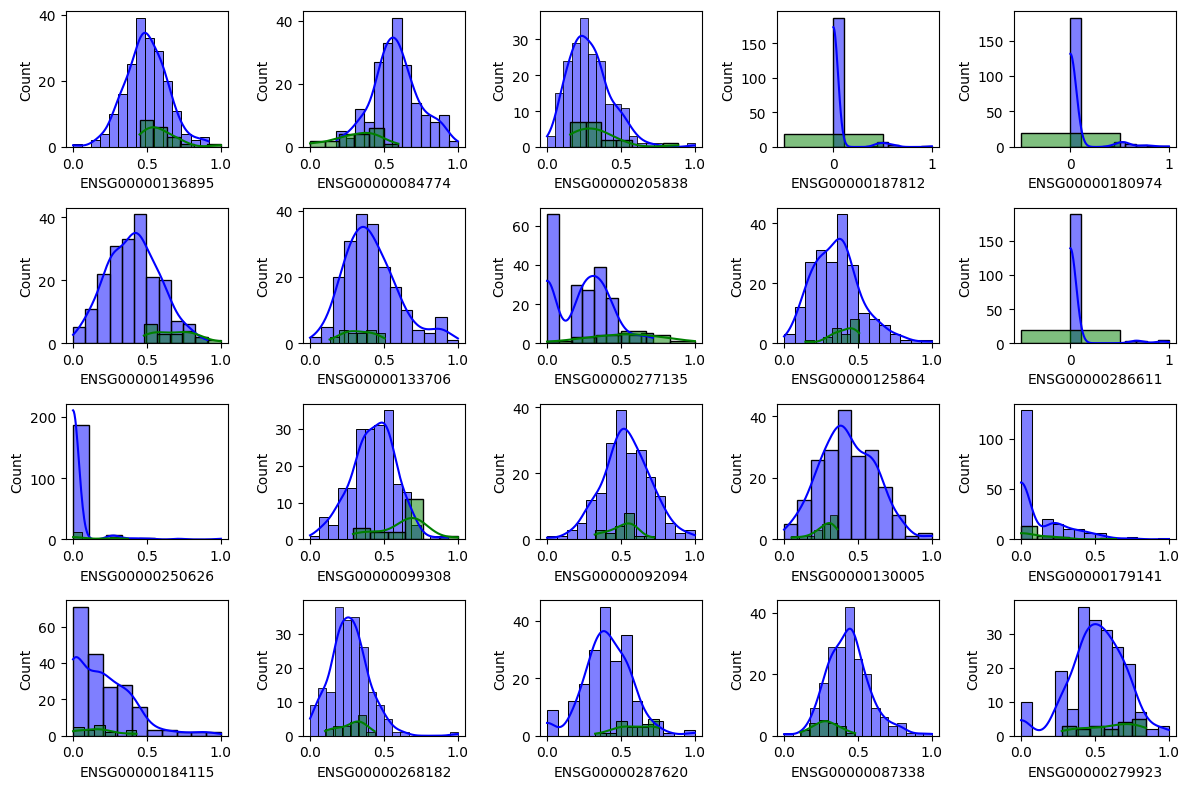

In [33]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_selected.columns):
    plt.subplot(4, 5, i + 1)
    sns.histplot(X_selected.loc[data['Condition'] == 'Tumor', col], kde=True, color='blue')
    sns.histplot(X_selected.loc[data['Condition'] == 'Normal', col], kde=True, color='green')
plt.tight_layout()
plt.show()

### Boxplot

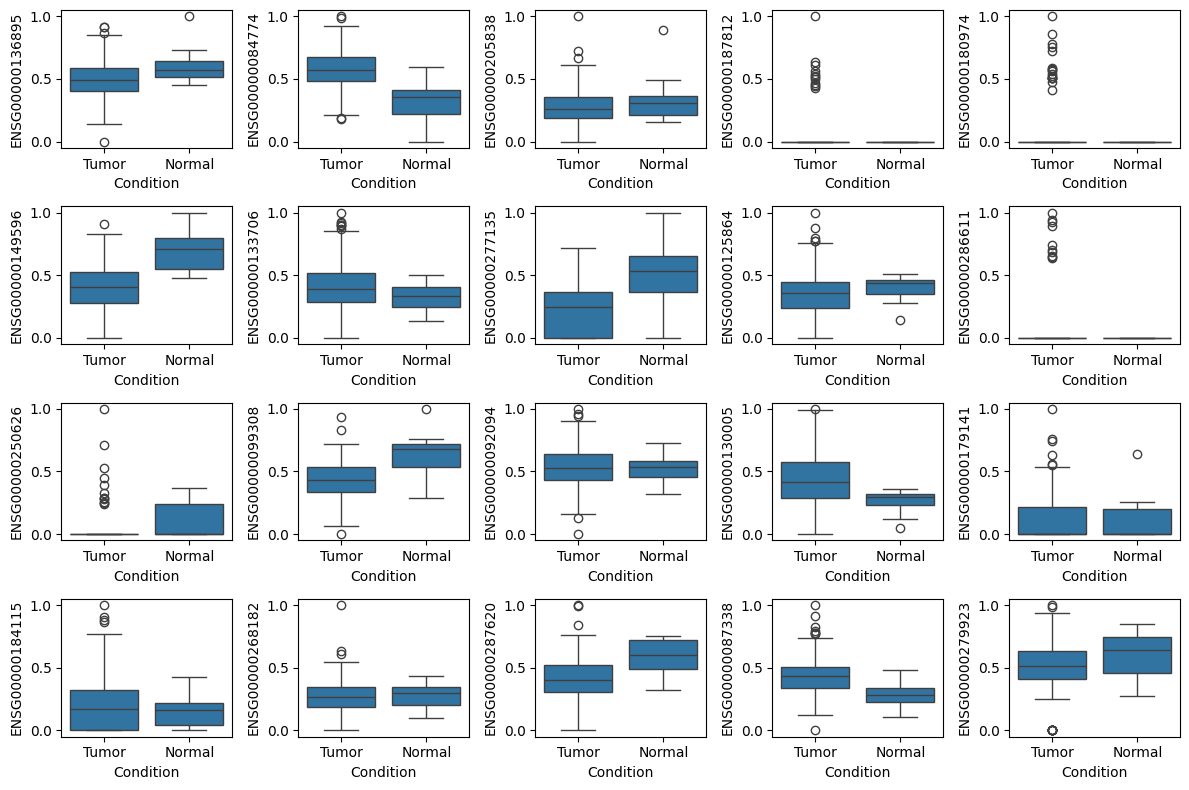

In [34]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_selected.columns):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=X_selected[col], x=data['Condition'])
plt.tight_layout()
plt.show()

### Densidade
* tumor: azul
* normal: verde

/tmp/ipykernel_236799/3980947411.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_selected.loc[data['Condition'] == 'Normal', col], fill=True, color='green', label='Normal')
/tmp/ipykernel_236799/3980947411.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_selected.loc[data['Condition'] == 'Normal', col], fill=True, color='green', label='Normal')
/tmp/ipykernel_236799/3980947411.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_selected.loc[data['Condition'] == 'Normal', col], fill=True, color='green', label='Normal')


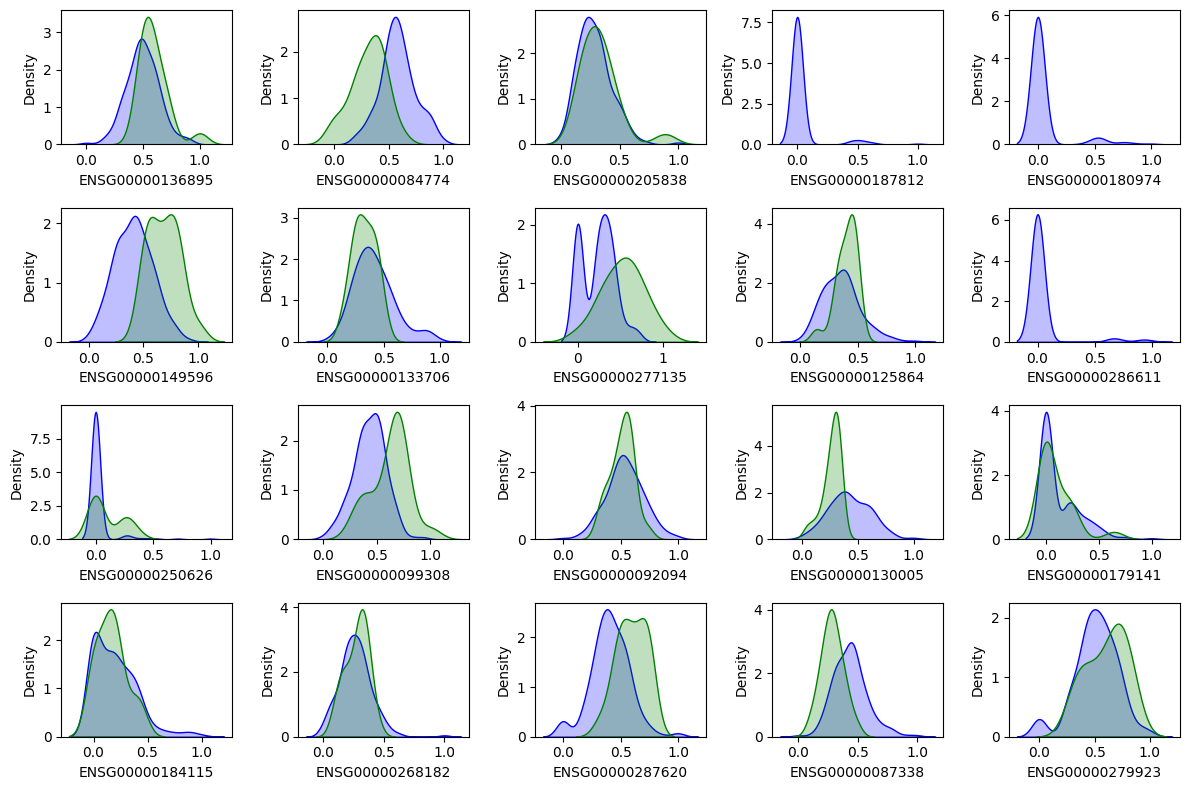

In [35]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_selected.columns):
    plt.subplot(4, 5, i + 1)
    sns.kdeplot(X_selected.loc[data['Condition'] == 'Tumor', col], fill=True, color='blue', label='Tumor')
    sns.kdeplot(X_selected.loc[data['Condition'] == 'Normal', col], fill=True, color='green', label='Normal')
plt.tight_layout()
plt.show()